In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

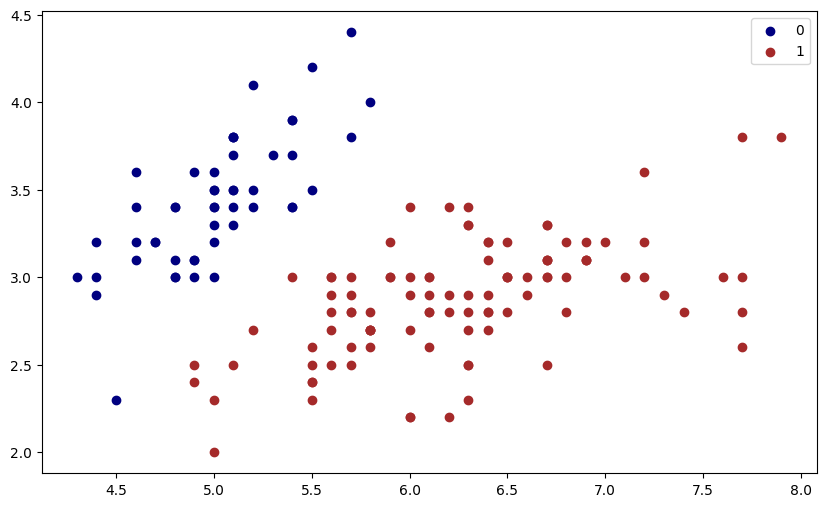

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
# iris.data is a two-dimensional ndarray of sepal length, sepal width, petal length, and petal width.
# X is sepal length and sepal width
X = iris.data[:, :2]
# iris.target is a one-dimensional ndarray of 0(=setosa), 1(=versicolor), 2(=virginica)
# If iris.target is not 0, it will be set to 1. it turns 2(=virginica) into 1(=versicolor).
y = np.where(iris.target!=0, 1, iris.target)
# X is an explanatory variable and plotted in two categories (0, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()


In [40]:
import numpy as np
from sklearn.datasets import load_iris


def add_intercept(X):
    '''Matrix for calculating linear multiple regression'''
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)


def sigmoid(z):
    '''sigmoid function'''
    return 1 / (1 + np.exp(-z))


def cross_entropy(h, y):
    '''cross entropy error'''
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def predict_prob(X, theta):
    '''Predict probability from X using latest weights with small cross entropy error'''
    X = add_intercept(X)
    return sigmoid(np.dot(X, theta))


def predict(X, theta):
    '''0.5 or more is classified as X, less than 0.5 is classified as theta'''
    return predict_prob(X, theta).round()



In [41]:
lr = 0.1
iter_nums = 300000

X = add_intercept(X)

# Initialize weights
theta = np.zeros(X.shape[1])

# steepest descent method
for i in range(iter_nums):
    z = np.dot(X, theta)
    h = sigmoid(z)

    # Gradient (=partial differential term)
    gradient = np.dot(X.T, (h - y)) / y.size
    # weights
    theta = theta - lr * gradient

    # cross entropy error
    loss = cross_entropy(h, y)
    if (i % 10000 == 0):
        print (f'loss: {loss} \t')

# Probability value prediction
iris = load_iris()
X = iris.data[:, :2]
predict_prob(X, theta)
# Predict classification labels
predict(X, theta)


loss: 0.6931471805599454 	
loss: 0.03432808634642343 	
loss: 0.028787025832133467 	
loss: 0.02571880776427713 	
loss: 0.023408635212947112 	
loss: 0.02150719901717697 	
loss: 0.019892517590830626 	
loss: 0.01850329552876697 	
loss: 0.017299305807070176 	
loss: 0.01624983679491447 	
loss: 0.015329924723359752 	
loss: 0.01451890984433595 	
loss: 0.013799672865938828 	
loss: 0.013158067641994306 	
loss: 0.012582429565328927 	
loss: 0.012063141842400473 	
loss: 0.011592261833140768 	
loss: 0.011163207785515772 	
loss: 0.010770501660660368 	
loss: 0.010409560916002604 	
loss: 0.01007653127087266 	
loss: 0.009768152873869885 	
loss: 0.009481653254137872 	
loss: 0.009214661554388425 	
loss: 0.008965139601333912 	
loss: 0.008731326283947356 	
loss: 0.008511692462681702 	
loss: 0.0083049042347413 	
loss: 0.008109792854048281 	
loss: 0.007925329973702603 	


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

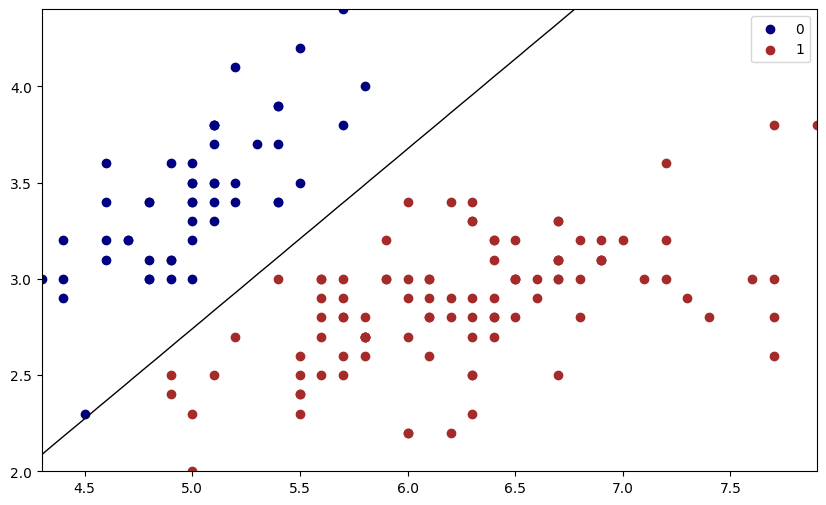

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()

# Define the scale of the XY axis
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
grid = np.c_[xx.ravel(), yy.ravel()]
# Fill in the classified lines
probs = predict_prob(grid, theta).reshape(xx.shape)
plt.contour(xx, yy, probs, [0.5], linewidths=1, colors='black')

In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

X = iris.data[:, :2]
y = np.where(iris.target!=0, 1, iris.target)
model = LogisticRegression()
model.fit(X, y)
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
